In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar los datos de los archivos CSV
vino_tinto = pd.read_csv('/content/winequality-red.csv', sep=';')
vino_blanco = pd.read_csv('/content/winequality-white.csv', sep=';')



In [12]:
# Agregar una columna para identificar el tipo de vino
vino_tinto['tipo_vino'] = 'tinto'
vino_blanco['tipo_vino'] = 'blanco'

# Combinar los datasets en uno solo
datos_vino = pd.concat([vino_tinto, vino_blanco], axis=0)

datos_vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo_vino
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto


# **Limpieza de Datos:**

**Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [8]:
# Verificar la cantidad de duplicados en ambos datasets
duplicated_red_wine = vino_tinto.duplicated().sum()
duplicated_white_wine = vino_blanco.duplicated().sum()

print(duplicated_red_wine)
print(duplicated_white_wine)

240
937


In [10]:
# Eliminar duplicados
datos_vino = datos_vino.drop_duplicates()

duplicados= datos_vino.duplicated().sum()
print(duplicados)

0


**Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [11]:
# Verificar tipos de datos
print("Tipos de datos:\n", datos_vino.dtypes)

Tipos de datos:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
tipo_vino                object
dtype: object


**Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.**

In [13]:
# Identificar columnas categóricas
columnas_categoricas = ['tipo_vino']

# Revisar valores únicos de cada columna categórica
for columna in columnas_categoricas:
    print(f"Valores únicos en {columna}: {datos_vino[columna].unique()}")

Valores únicos en tipo_vino: ['tinto' 'blanco']


In [15]:
# Corrección de inconsistencias en la columna 'tipo_vino'
datos_vino['tipo_vino'] = datos_vino['tipo_vino'].str.lower()  # Convertir a minúsculas
datos_vino['tipo_vino'] = datos_vino['tipo_vino'].replace({
    'tinto ': 'tinto',  # Eliminar espacios extra
    'blanco ': 'blanco'
})

for columna in columnas_categoricas:
    print(f"Valores únicos después de la corrección en {columna}: {datos_vino[columna].unique()}")

Valores únicos después de la corrección en tipo_vino: ['tinto' 'blanco']


**Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.**

In [18]:
# Verificar valores faltantes
valores_faltantes = datos_vino.isnull().sum()
print("Valores faltantes:\n", valores_faltantes)



Valores faltantes:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
tipo_vino               0
dtype: int64


#**2: Exploración de Datos**

**Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

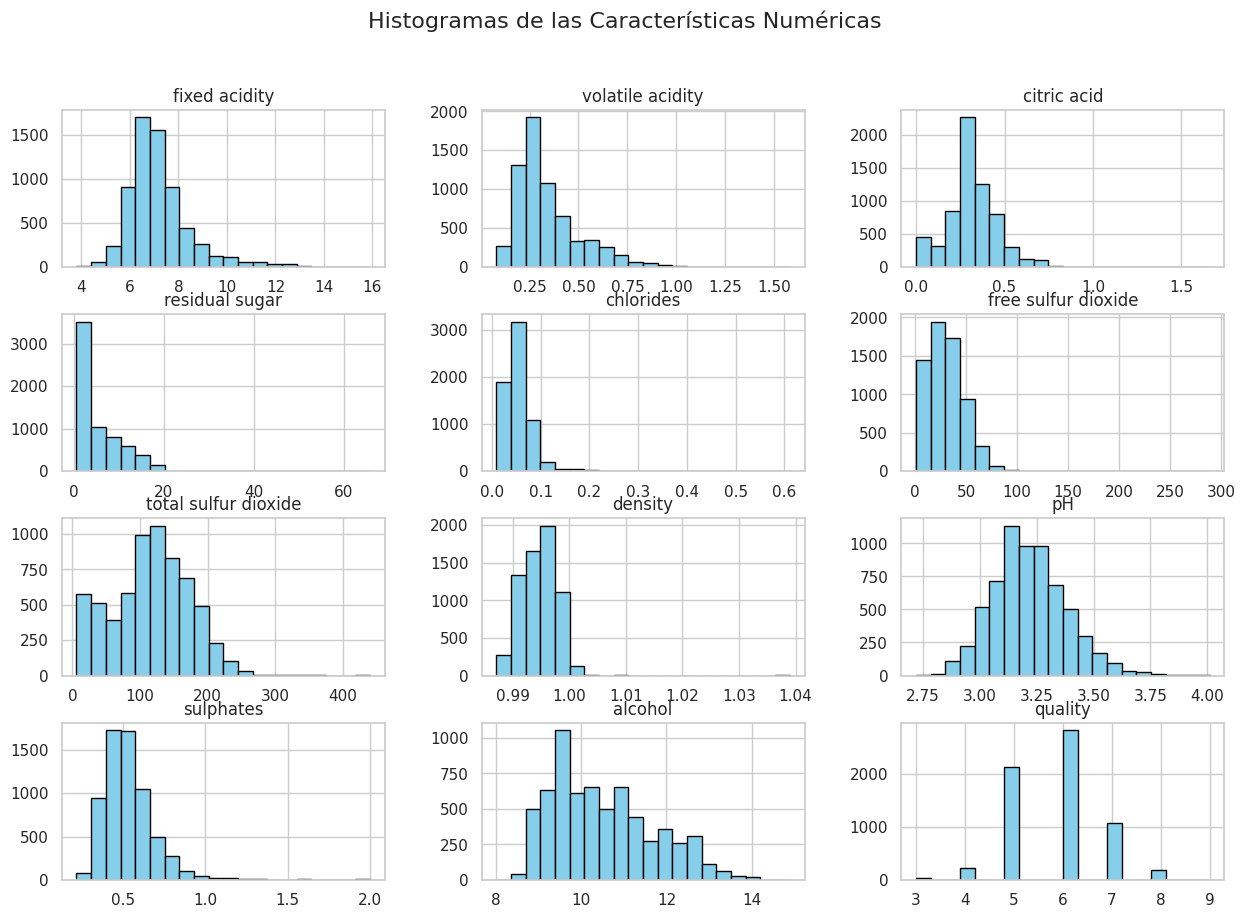

In [20]:
# Estilo de los gráficos
sns.set(style="whitegrid")


# Histogramas para todas las características numéricas
datos_vino.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de las Características Numéricas', fontsize=16)
plt.show()

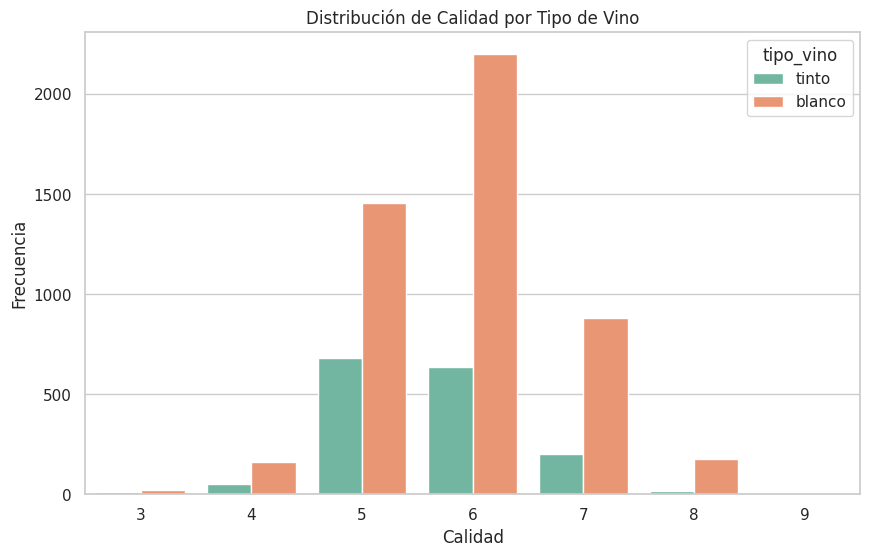

In [21]:
# Gráficos de barras de la distribución de calidad
plt.figure(figsize=(10, 6))
sns.countplot(data=datos_vino, x='quality', hue='tipo_vino', palette='Set2')
plt.title('Distribución de Calidad por Tipo de Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

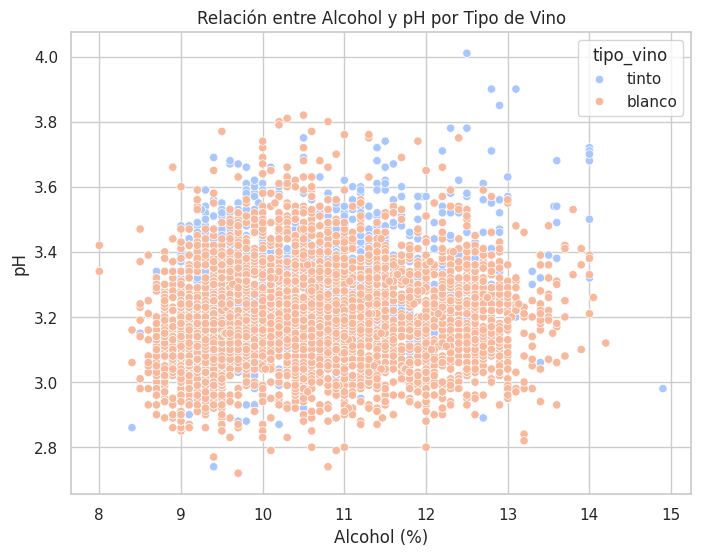

In [23]:
# Diagramas de dispersión
# Ejemplo: Relación entre el alcohol y el pH
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos_vino, x='alcohol', y='pH', hue='tipo_vino', palette='coolwarm')
plt.title('Relación entre Alcohol y pH por Tipo de Vino')
plt.xlabel('Alcohol (%)')
plt.ylabel('pH')
plt.show()

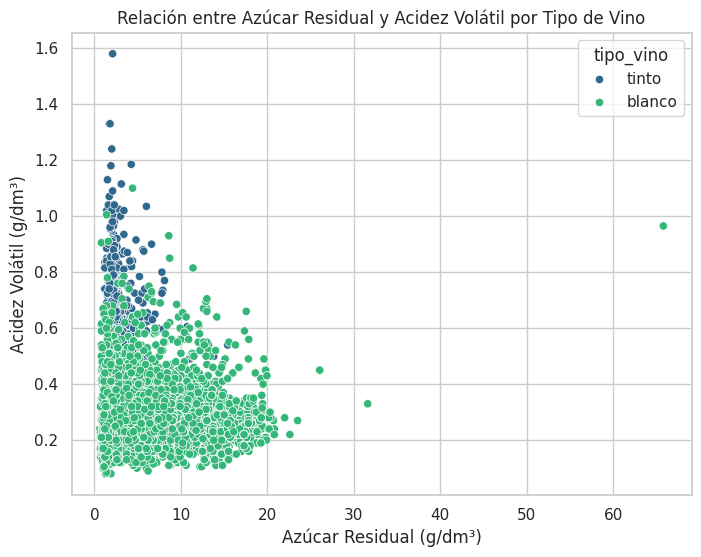

In [24]:
# Ejemplo: Relación entre el azúcar residual y la acidez volátil
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos_vino, x='residual sugar', y='volatile acidity', hue='tipo_vino', palette='viridis')
plt.title('Relación entre Azúcar Residual y Acidez Volátil por Tipo de Vino')
plt.xlabel('Azúcar Residual (g/dm³)')
plt.ylabel('Acidez Volátil (g/dm³)')
plt.show()

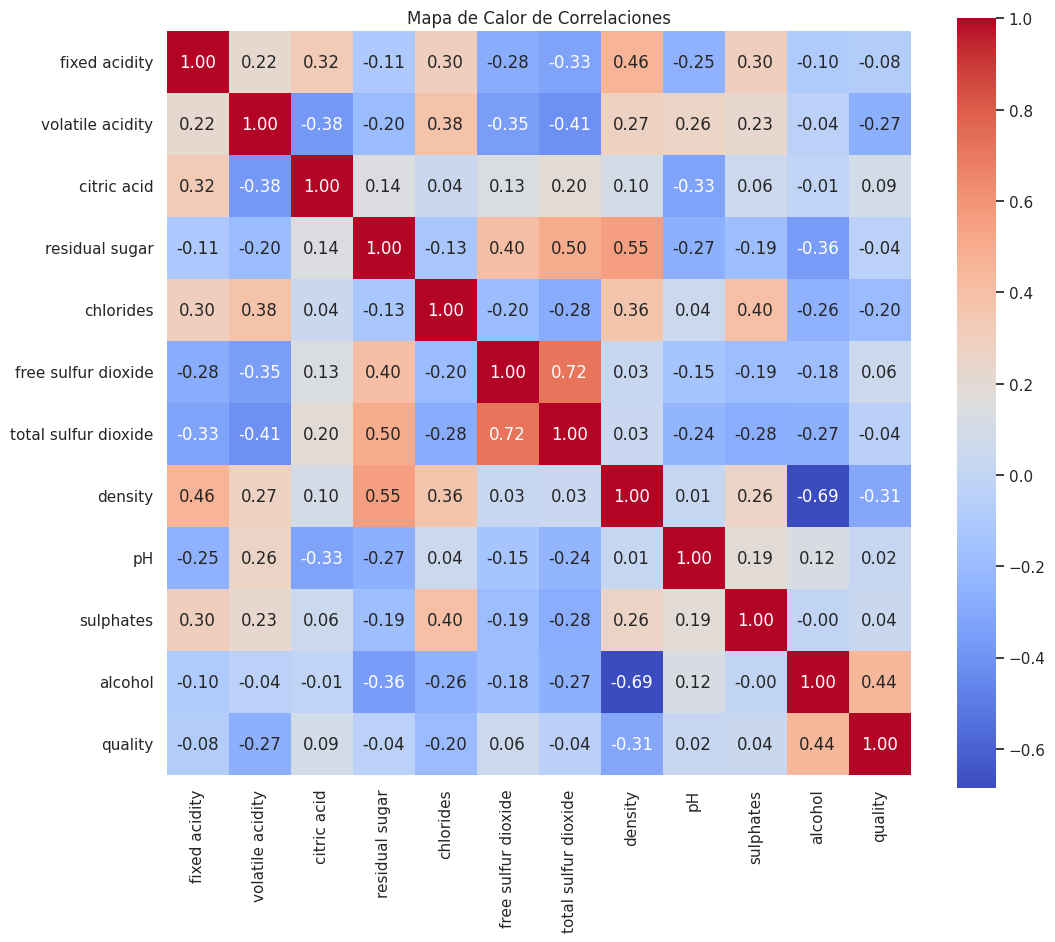

In [26]:
# Excluir columnas no numéricas
datos_numericos = datos_vino.select_dtypes(include=['float64', 'int64'])

# Mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
correlation_matrix = datos_numericos.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


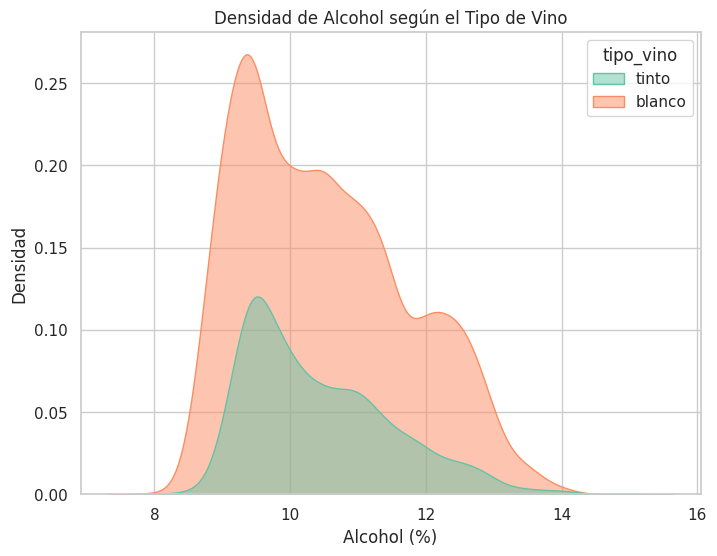

In [27]:
# Gráficos de densidad para el alcohol según el tipo de vino
plt.figure(figsize=(8, 6))
sns.kdeplot(data=datos_vino, x='alcohol', hue='tipo_vino', fill=True, alpha=0.5, palette='Set2')
plt.title('Densidad de Alcohol según el Tipo de Vino')
plt.xlabel('Alcohol (%)')
plt.ylabel('Densidad')
plt.show()

**Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.**

In [31]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos_vino.select_dtypes(include=['float64', 'int64'])


# Calcular estadísticas descriptivas
estadisticas = pd.DataFrame()

# Medidas de tendencia central
estadisticas['Media'] = datos_numericos.mean()
estadisticas['Mediana'] = datos_numericos.median()
estadisticas['Moda'] = datos_numericos.mode().iloc[0]  # Primera moda (en caso de múltiples modas)

# Medidas de dispersión
estadisticas['Rango'] = datos_numericos.max() - datos_numericos.min()
estadisticas['Desviación Estándar'] = datos_numericos.std()

# Mostrar las estadísticas descriptivas en la consola
print("Estadísticas Descriptivas:\n", estadisticas)

Estadísticas Descriptivas:
                            Media    Mediana      Moda      Rango  \
fixed acidity           7.215307    7.00000    6.8000   12.10000   
volatile acidity        0.339666    0.29000    0.2800    1.50000   
citric acid             0.318633    0.31000    0.3000    1.66000   
residual sugar          5.443235    3.00000    2.0000   65.20000   
chlorides               0.056034    0.04700    0.0440    0.60200   
free sulfur dioxide    30.525319   29.00000   29.0000  288.00000   
total sulfur dioxide  115.744574  118.00000  111.0000  434.00000   
density                 0.994697    0.99489    0.9972    0.05187   
pH                      3.218501    3.21000    3.1600    1.29000   
sulphates               0.531268    0.51000    0.5000    1.78000   
alcohol                10.491801   10.30000    9.5000    6.90000   
quality                 5.818378    6.00000    6.0000    6.00000   

                      Desviación Estándar  
fixed acidity                    1.296434  

# **3.Implementación de Modelos:**

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Cargar los datasets originales
vino_tinto = pd.read_csv('/content/winequality-red.csv', sep=';')
vino_blanco = pd.read_csv('/content/winequality-white.csv', sep=';')

In [53]:
# Agregar una columna para identificar el tipo de vino
vino_tinto['tipo_vino'] = 'tinto'
vino_blanco['tipo_vino'] = 'blanco'

In [54]:
# Combinar los datasets en uno solo
datos_vino = pd.concat([vino_tinto, vino_blanco], axis=0)

datos_vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo_vino
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto


In [55]:
# Preparación de los datos
# Separar características (X) y objetivo (y)
X = datos_vino.drop(columns=['quality', 'tipo_vino'])  # Características
y = datos_vino['quality']  # Variable objetivo

In [56]:
# Convertir la calidad en un problema de clasificación binaria (calidad >= 6 es alta)
y_binario = (y >= 6).astype(int)

# Normalizar las características
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

In [57]:
# Dividir en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_escalado, y_binario, test_size=0.2, random_state=42)


**Modelos de Clasificación: Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).**

In [58]:
# Regresión Logística
modelo_reg_log = LogisticRegression()
modelo_reg_log.fit(X_entrenamiento, y_entrenamiento)
y_pred_reg_log = modelo_reg_log.predict(X_prueba)

In [59]:
# K-Nearest Neighbors
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_entrenamiento, y_entrenamiento)
y_pred_knn = modelo_knn.predict(X_prueba)

**Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.**

In [61]:
# Evaluar el modelo de Regresión Logística
print("Evaluación del Modelo de Regresión Logística:")
y_pred_reg_log = modelo_reg_log.predict(X_prueba)

# Métricas principales
accuracy_reg_log = accuracy_score(y_prueba, y_pred_reg_log)
precision_reg_log = precision_score(y_prueba, y_pred_reg_log)
recall_reg_log = recall_score(y_prueba, y_pred_reg_log)
f1_reg_log = f1_score(y_prueba, y_pred_reg_log)

print(f"Accuracy: {accuracy_reg_log:.2f}")
print(f"Precision: {precision_reg_log:.2f}")
print(f"Recall: {recall_reg_log:.2f}")
print(f"F1-Score: {f1_reg_log:.2f}")
print("\nReporte de Clasificación:\n")
print(classification_report(y_prueba, y_pred_reg_log))

# Matriz de Confusión
print("Matriz de Confusión - Regresión Logística:")
print(confusion_matrix(y_prueba, y_pred_reg_log))

Evaluación del Modelo de Regresión Logística:
Accuracy: 0.72
Precision: 0.78
Recall: 0.80
F1-Score: 0.79

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       451
           1       0.78      0.80      0.79       849

    accuracy                           0.72      1300
   macro avg       0.69      0.69      0.69      1300
weighted avg       0.72      0.72      0.72      1300

Matriz de Confusión - Regresión Logística:
[[262 189]
 [170 679]]


In [62]:
# Evaluar el modelo de K-Nearest Neighbors
print("\nEvaluación del Modelo de K-Nearest Neighbors (KNN):")
y_pred_knn = modelo_knn.predict(X_prueba)

# Métricas principales
accuracy_knn = accuracy_score(y_prueba, y_pred_knn)
precision_knn = precision_score(y_prueba, y_pred_knn)
recall_knn = recall_score(y_prueba, y_pred_knn)
f1_knn = f1_score(y_prueba, y_pred_knn)

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")
print("\nReporte de Clasificación:\n")
print(classification_report(y_prueba, y_pred_knn))

# Matriz de Confusión
print("Matriz de Confusión - KNN:")
print(confusion_matrix(y_prueba, y_pred_knn))


Evaluación del Modelo de K-Nearest Neighbors (KNN):
Accuracy: 0.75
Precision: 0.80
Recall: 0.82
F1-Score: 0.81

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.64      0.63      0.63       451
           1       0.80      0.82      0.81       849

    accuracy                           0.75      1300
   macro avg       0.72      0.72      0.72      1300
weighted avg       0.75      0.75      0.75      1300

Matriz de Confusión - KNN:
[[282 169]
 [156 693]]


**Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.**

In [63]:
# Comparación del rendimiento entre modelos
print("\nComparación del Rendimiento:")
print(f"Accuracy Regresión Logística: {accuracy_reg_log:.2f}")
print(f"Accuracy KNN: {accuracy_knn:.2f}")
if accuracy_reg_log > accuracy_knn:
    print("El modelo de Regresión Logística tiene mejor rendimiento.")
else:
    print("El modelo de KNN tiene mejor rendimiento.")


Comparación del Rendimiento:
Accuracy Regresión Logística: 0.72
Accuracy KNN: 0.75
El modelo de KNN tiene mejor rendimiento.
